In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/raw.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
split_data = data.iloc[:, 0].str.split(' ', expand=True)

In [ ]:
numeric_data = split_data.apply(pd.to_numeric, errors='coerce')

In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23999 non-null  float64
 1   1       23999 non-null  float64
 2   2       23999 non-null  float64
 3   3       23999 non-null  float64
 4   4       23999 non-null  float64
 5   5       23999 non-null  float64
 6   6       23999 non-null  float64
 7   7       23999 non-null  float64
 8   8       23999 non-null  float64
 9   9       23999 non-null  float64
 10  10      23999 non-null  float64
 11  11      23999 non-null  float64
 12  12      23999 non-null  float64
 13  13      23999 non-null  float64
 14  14      23999 non-null  float64
 15  15      23999 non-null  float64
 16  16      23999 non-null  float64
 17  17      23999 non-null  float64
 18  18      23999 non-null  float64
 19  19      23999 non-null  float64
 20  20      23999 non-null  float64
 21  21      23999 non-null  float64
 22

In [ ]:
numeric_data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.34149,1.786558,2.354766,1.047929,2.268974,4.637777,3.793194,2.859702,4.361058,3.592485,...,4.837370,2.846538,3.413201,4.154079,4.700800,3.597879,4.681148,3.215494,3.972672,NaN
1,1.33034,1.826187,3.037997,4.719517,1.502280,3.644736,3.575727,1.337686,2.380347,4.503771,...,3.757999,3.161658,4.996056,3.339642,2.548468,4.417111,1.375554,4.363320,2.988546,NaN
2,1.35653,1.739225,4.412804,2.220680,3.132738,1.327124,4.759890,2.882082,3.663430,4.531524,...,1.018926,4.379308,3.280298,3.916281,3.179922,3.769315,0.849544,2.508179,0.912272,NaN
3,1.30190,1.955829,2.790669,0.798177,1.231750,1.977844,2.393930,4.738126,1.364743,3.391665,...,1.564076,2.178406,2.754888,4.007165,0.702069,4.064682,1.370575,0.769475,1.395959,NaN
4,1.33675,1.768437,2.729291,3.329811,3.472018,1.658671,3.954324,4.016680,1.608847,4.580460,...,1.654105,3.437324,0.856915,2.839171,4.887141,1.937407,4.749836,0.948644,3.830981,NaN


In [ ]:
correlation_matrix = numeric_data.corr()

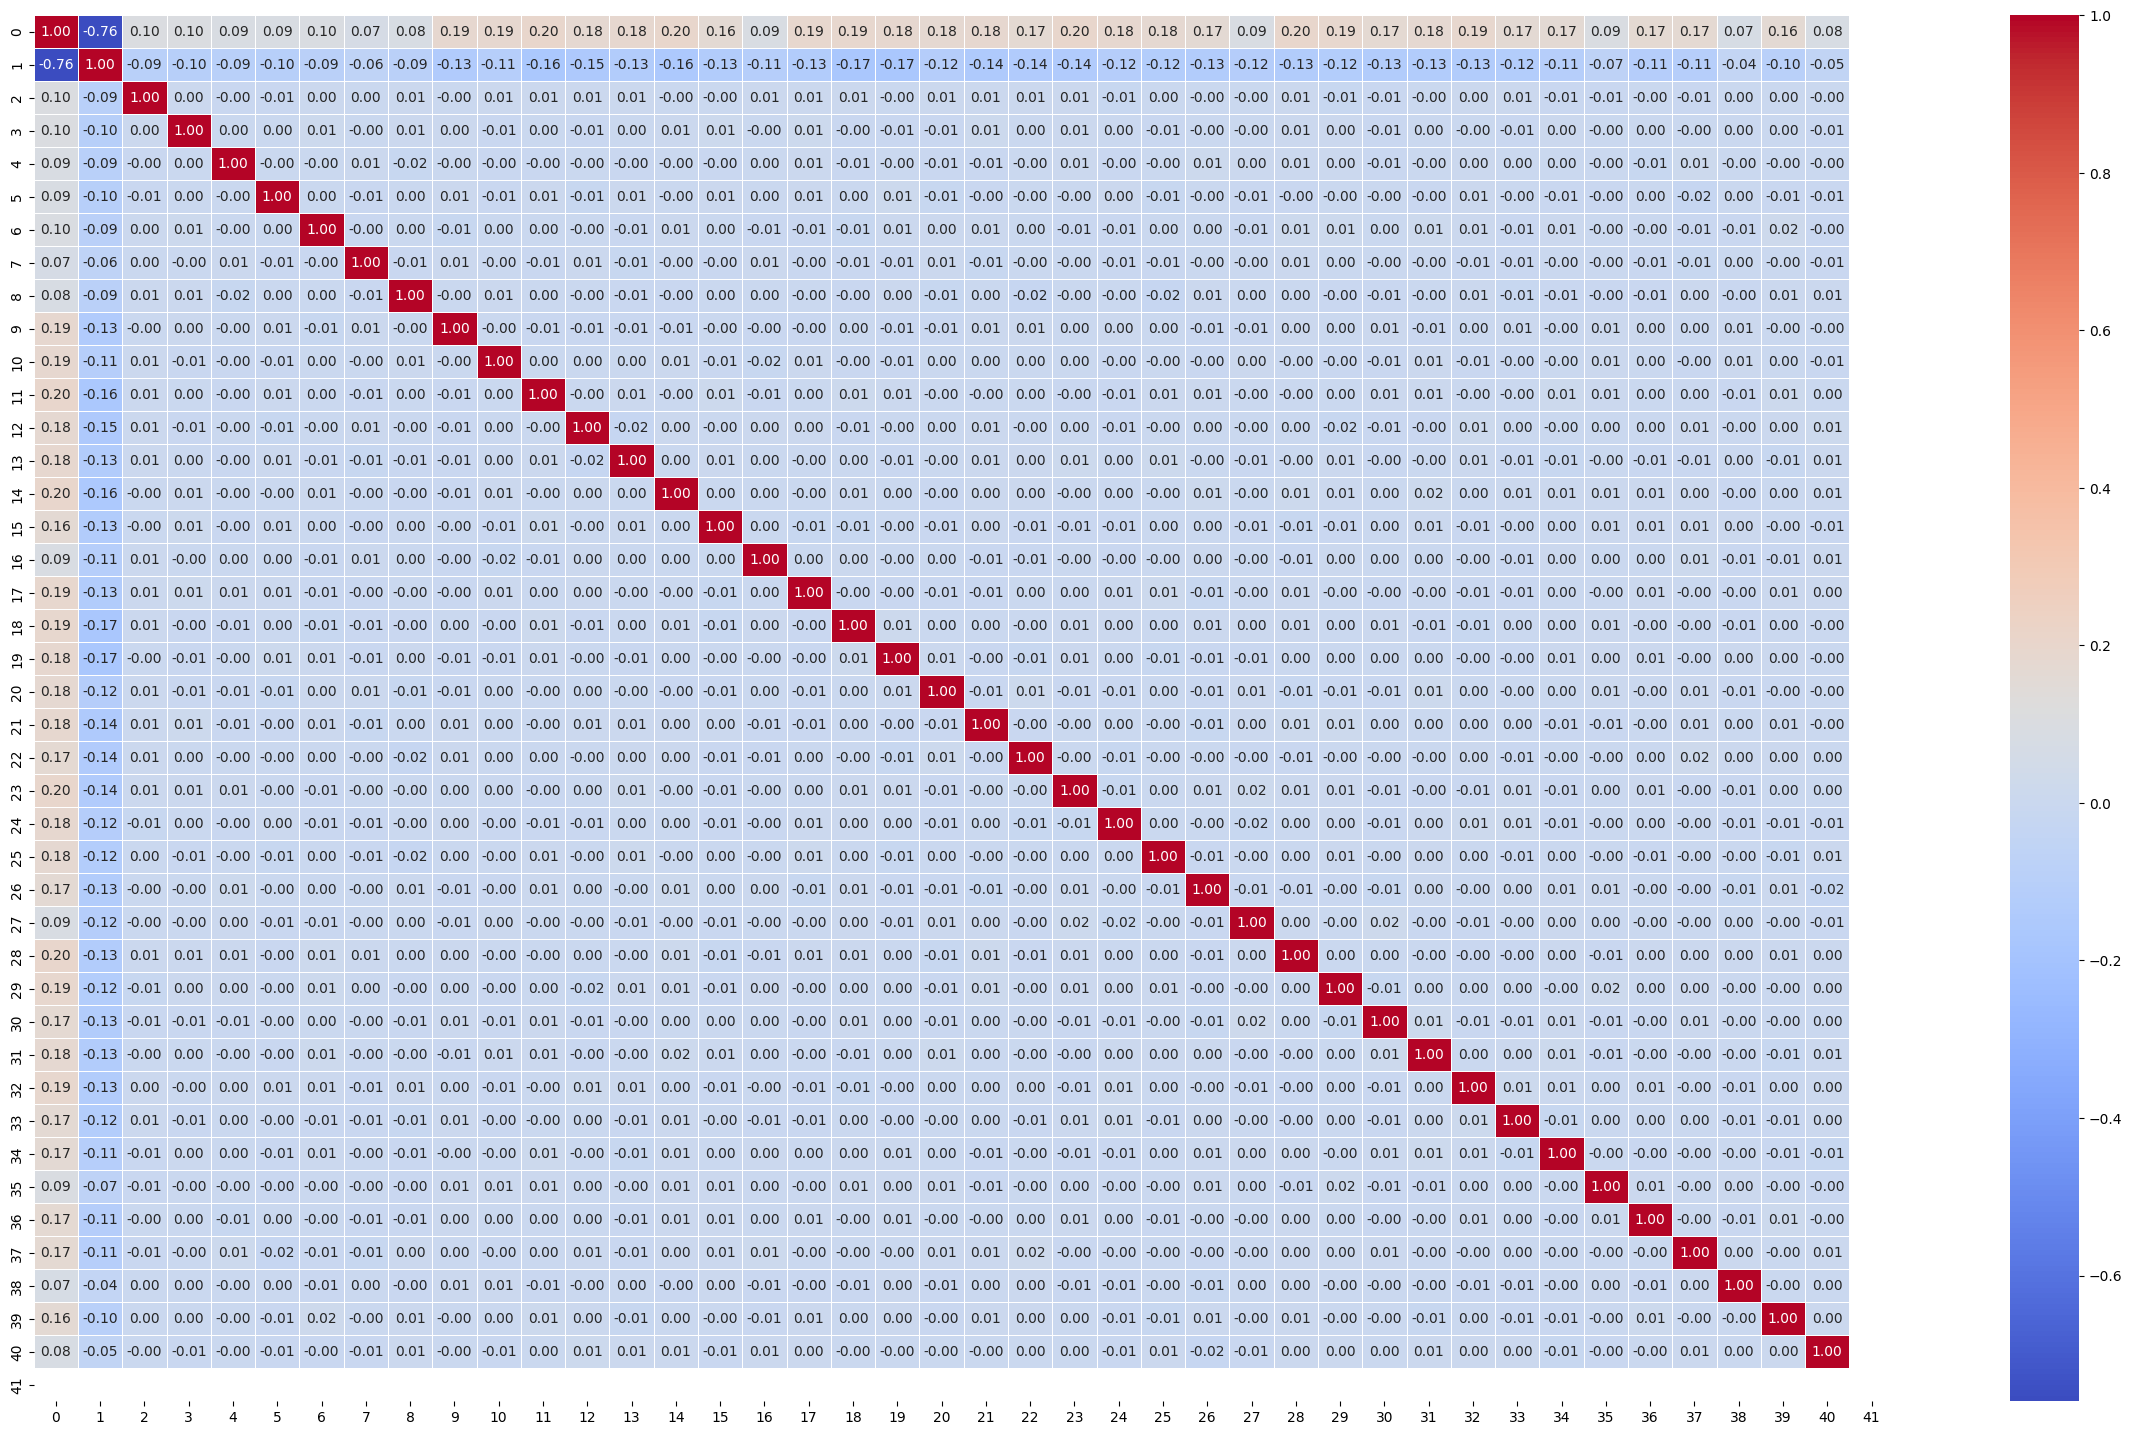

In [ ]:
plt.figure(figsize=(30,18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
X = numeric_data.iloc[:, list(range(2, 41))].values
y = numeric_data.iloc[:, [0,1]].values

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scale = scaler.fit_transform(X)

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
model.fit(X_scale, y)

RandomForestRegressor(random_state=42)

In [ ]:
test_data = pd.read_csv('/content/test.csv')

In [ ]:
split = test_data.iloc[:, 0].str.split(' ', expand=True)

In [ ]:
test = split_data.apply(pd.to_numeric, errors='coerce')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23999 non-null  float64
 1   1       23999 non-null  float64
 2   2       23999 non-null  float64
 3   3       23999 non-null  float64
 4   4       23999 non-null  float64
 5   5       23999 non-null  float64
 6   6       23999 non-null  float64
 7   7       23999 non-null  float64
 8   8       23999 non-null  float64
 9   9       23999 non-null  float64
 10  10      23999 non-null  float64
 11  11      23999 non-null  float64
 12  12      23999 non-null  float64
 13  13      23999 non-null  float64
 14  14      23999 non-null  float64
 15  15      23999 non-null  float64
 16  16      23999 non-null  float64
 17  17      23999 non-null  float64
 18  18      23999 non-null  float64
 19  19      23999 non-null  float64
 20  20      23999 non-null  float64
 21  21      23999 non-null  float64
 22

In [ ]:
X_test = test.iloc[:, list(range(2, 41))].values
y_test = test.iloc[:, [0,1]].values

In [ ]:
X_test_scale = scaler.fit_transform(X_test)

In [ ]:
y_pred = (model.predict(X_test_scale))

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.0005766056503342512


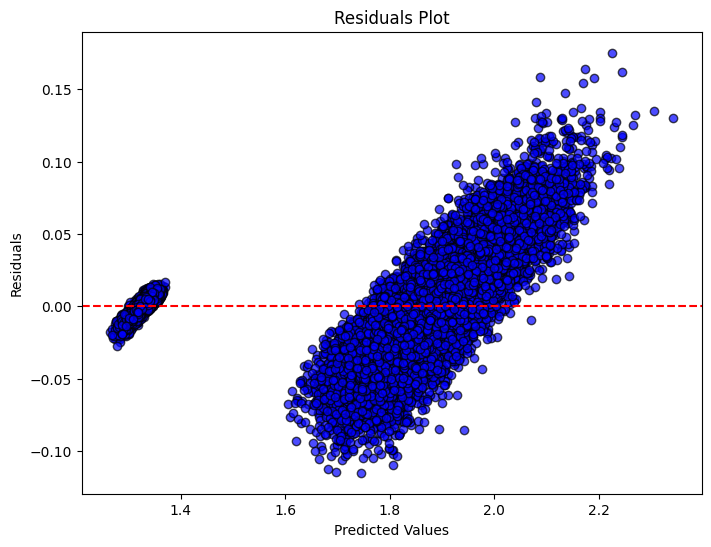

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()